In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from bband import get_data,Strategy
# plt.style.use('seaborn')
df_dict = {}

In [2]:
df_dict = {}
candidate = ['ETH','BTC','BNB','SOL','MATIC',
               'XRP','DYDX','AVAX','LINK','GAS',
               'DOGE','ORDI','TRB','WLD','ADA',
               'OP','FIL','ZRX','LTC','RUNE','ATOM',
               'ARB','GMT','ETC','ARK','BCH','DOT',
               'LDO','SUI','GALA','CAKE',
               'APE','INJ','FTM','APT','YFI','OMG',
               'SEI','EOS','1000SHIB','NEAR',
               'MKR','CYBER','UNI',
               'BLUR','SUSHI','WAVES','MASK','MANA',
               'EGLD','AAVE','NEO','FET','TRX','GRT','ALGO','STX','XLM']
for coin in candidate:
    df_dict[coin] = pd.read_hdf(f'/Users/johnsonhsiao/Desktop/data/{coin}USDT_PERPETUAL.h5')

In [18]:
candidate = ['ARB']
for coin in candidate:
    df_dict[coin] = get_data(coin)

APY: 41.42 %
MDD: 5.59 %
MDD Duration 100 days 15:00:00
worst trade: -1.37 %
2023-05-18 17:00:00 ~ 2023-05-18 19:00:00
avg holding days: 0.63 days
--------------------------------------------
PF: 3.12
Sharpe Ratio: 2.20
Calmar Ratio: 7.89
Sortino Ratio: 3.96
Omega Ratio: 1.28
--------------------------------------------
Expectancy : 0.76 %
Total Time Exposure : 9.42 %
Total Trades: 36
Win Rate: 47.22 %
--------------------------------------------
PF * Win Rate: 1.473


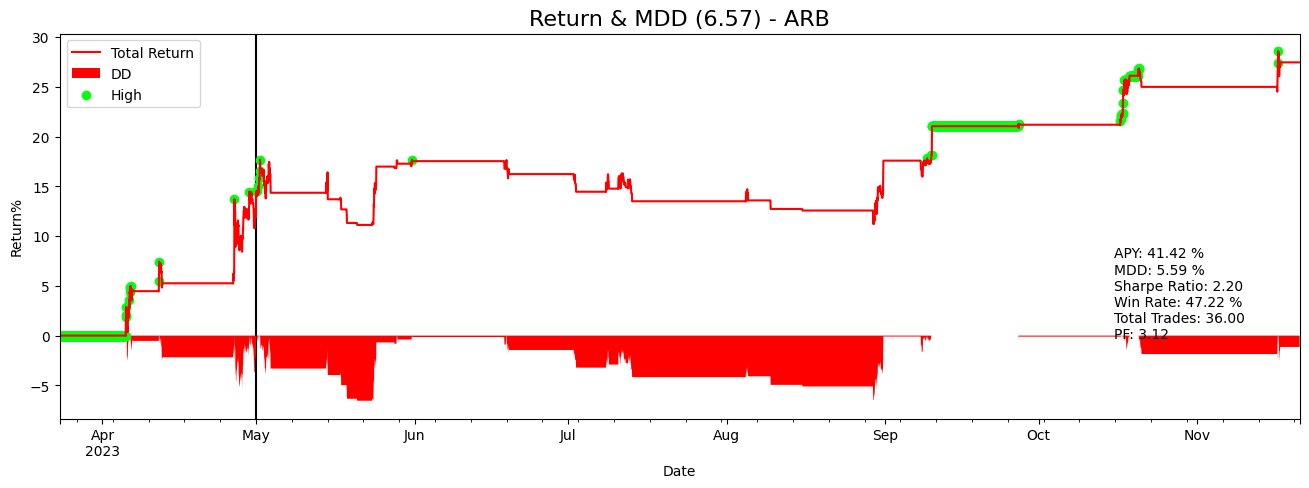

(None,
 Start                               2023-03-23 15:00:00
 End                                 2023-11-21 01:00:00
 Period                                242 days 11:00:00
 Start Value                                     10000.0
 Min Value                                     9997.0009
 Max Value                                  12860.229064
 End Value                                  12746.313024
 Total Return [%]                               27.46313
 Benchmark Return [%]                          -22.12583
 Total Time Exposure [%]                        9.417426
 Max Gross Exposure [%]                            100.0
 Max Drawdown [%]                               5.586541
 Max Drawdown Duration                 100 days 15:00:00
 Total Orders                                         72
 Total Fees Paid                              215.109774
 Total Trades                                         36
 Win Rate [%]                                  47.222222
 Best Trade [%]         

In [21]:
start = '2022-01-01'
sep = ''
end = ''

params = {"window_size": 244,
          "window_size_l":244,
        "multiplier": 2}

side = 'short'
config = {'freq':'1h', 'lag':1, 'fee': 0.0003, 'weekend_filter': False, 'rv_filter':False}
coin = 'ARB'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])

In [7]:
short.head(10)

,Unnamed: 0,params,value,Start,End,Period,Start Value,Min Value,Max Value,End Value,Total Return [%],Benchmark Return [%],Total Time Exposure [%],Max Gross Exposure [%],Max Drawdown [%],Max Drawdown Duration,Total Orders,Total Fees Paid,Total Trades,Win Rate [%],Best Trade [%],Worst Trade [%],Avg Winning Trade [%],Avg Losing Trade [%],Avg Winning Trade Duration,Avg Losing Trade Duration,Profit Factor,Expectancy,Sharpe Ratio,Calmar Ratio,Omega Ratio,Sortino Ratio,side
0,19,"{'window_size': 48, 'multiplier': 2.5}",open_time\n2022-01-01 00:00:00 10000.000000...,2022-01-01,2023-05-01 23:00:00,486 days,10000.0,9868.829250,20741.807233,19581.441131,95.814411,-81.371002,8.033265,101.241424,7.993754,107 days 13:00:00,370,1106.749795,185,40.000000,13.181381,-4.289633,3.026533,-1.154126,0 days 08:34:51.891891891,0 days 02:43:14.594594594,1.747920,51.791574,2.842693,8.212295,1.366758,4.777331,short
1,18,"{'window_size': 48, 'multiplier': 2.0}",open_time\n2022-01-01 00:00:00 10000.000000...,2022-01-01,2023-05-01 23:00:00,486 days,10000.0,9868.829250,20741.807233,19581.441131,95.814411,-81.371002,8.033265,101.241424,7.993754,107 days 13:00:00,370,1106.749795,185,40.000000,13.181381,-4.289633,3.026533,-1.154126,0 days 08:34:51.891891891,0 days 02:43:14.594594594,1.747920,51.791574,2.842693,8.212295,1.366758,4.777331,short
2,139,"{'window_size': 288, 'multiplier': 2.5}",open_time\n2022-01-01 00:00:00 10000.000000...,2022-01-01,2023-05-01 23:00:00,486 days,10000.0,9797.207248,20645.991581,19864.163518,98.641635,-81.371002,9.773663,100.789913,13.352010,137 days 19:00:00,142,422.757100,71,28.169014,26.587451,-5.369684,7.724569,-1.090446,1 days 17:00:00,0 days 06:16:28.235294117,2.773944,138.931881,2.601505,5.050929,1.299960,4.211665,short
3,138,"{'window_size': 288, 'multiplier': 2.0}",open_time\n2022-01-01 00:00:00 10000.000000...,2022-01-01,2023-05-01 23:00:00,486 days,10000.0,9797.207248,20645.991581,19864.163518,98.641635,-81.371002,9.773663,100.789913,13.352010,137 days 19:00:00,142,422.757100,71,28.169014,26.587451,-5.369684,7.724569,-1.090446,1 days 17:00:00,0 days 06:16:28.235294117,2.773944,138.931881,2.601505,5.050929,1.299960,4.211665,short
4,101,"{'window_size': 212, 'multiplier': 2.5}",open_time\n2022-01-01 00:00:00 10000.000000...,2022-01-01,2023-05-01 23:00:00,486 days,10000.0,9715.004529,18509.319297,17249.919057,72.499191,-81.371002,8.513374,101.868722,10.515304,166 days 08:00:00,162,483.350297,81,25.925926,18.424296,-3.966095,6.607195,-1.097672,1 days 03:37:08.571428571,0 days 06:53:00,2.101002,89.505174,1.975818,4.812329,1.238536,3.313417,short
5,100,"{'window_size': 212, 'multiplier': 2.0}",open_time\n2022-01-01 00:00:00 10000.000000...,2022-01-01,2023-05-01 23:00:00,486 days,10000.0,9715.004529,18509.319297,17249.919057,72.499191,-81.371002,8.513374,101.868722,10.515304,166 days 08:00:00,162,483.350297,81,25.925926,18.424296,-3.966095,6.607195,-1.097672,1 days 03:37:08.571428571,0 days 06:53:00,2.101002,89.505174,1.975818,4.812329,1.238536,3.313417,short
6,136,"{'window_size': 284, 'multiplier': 2.0}",open_time\n2022-01-01 00:00:00 10000.000000...,2022-01-01,2023-05-01 23:00:00,486 days,10000.0,9792.839044,20480.265931,19195.175049,91.951750,-81.371002,9.713649,100.789913,13.531987,138 days 22:00:00,154,458.944309,77,28.571429,26.587451,-4.786408,6.809889,-1.047686,1 days 13:00:00,0 days 05:48:00,2.595958,119.417858,2.469278,4.669450,1.283823,3.980661,short
7,137,"{'window_size': 284, 'multiplier': 2.5}",open_time\n2022-01-01 00:00:00 10000.000000...,2022-01-01,2023-05-01 23:00:00,486 days,10000.0,9792.839044,20480.265931,19195.175049,91.951750,-81.371002,9.713649,100.789913,13.531987,138 days 22:00:00,154,458.944309,77,28.571429,26.587451,-4.786408,6.809889,-1.047686,1 days 13:00:00,0 days 05:48:00,2.595958,119.417858,2.469278,4.669450,1.283823,3.980661,short
8,20,"{'window_size': 52, 'multiplier': 2.0}",open_time\n2022-01-01 00:00:00 10000.000000...,2022-01-01,2023-05-01 23:00:00,486 days,10000.0,9997.000900,18357.689370,